## prepare fault receivers 


Loading XDMF file: /Users/DuoL/Documents/NSHM/Central/Joint3/data-jp3z/jp3zBbpn0-fault.xdmf

Mesh statistics:
  Total vertices: 304263
  Total triangular elements: 101421
  Converted z-coordinates from meters to kilometers
  Depth range: -29.94 to -0.06 km

Filtering at depth z = -5.0 ± 0.03 km:
  Elements at target depth: 164
  Creating grid: 1729 x 1342 bins
  Populated bins: 164
  Selected elements: 164

Applying lateral spacing of 50.0 km:
  Selected elements: 164
  Spatial extent:
    X: 1715875.92 to 1802284.29 km
    Y: 5388590.67 to 5455650.17 km
Selected 164 of 164 elements

Figure saved to: centroids_plot.png


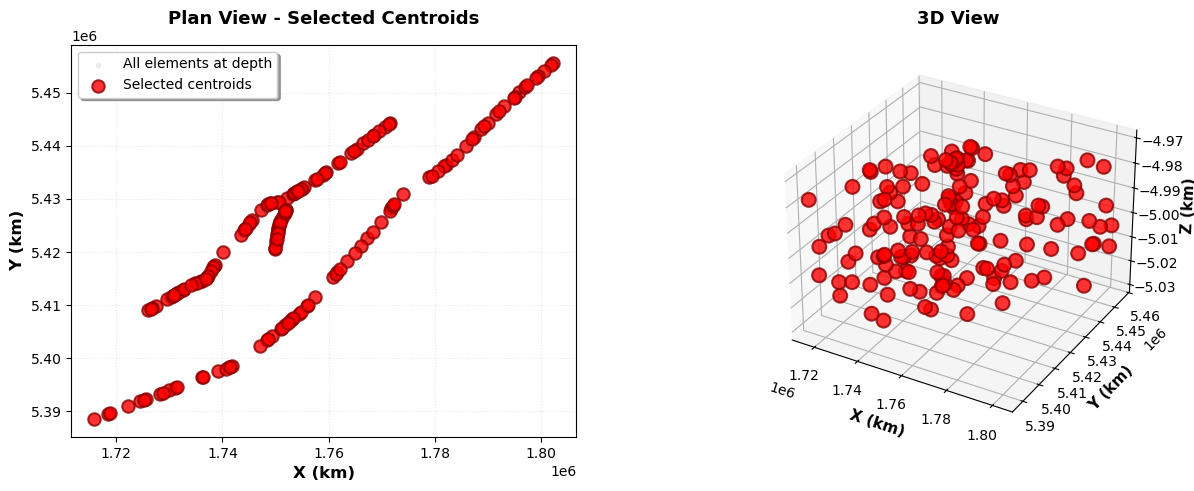

In [15]:
# In a notebook cell:
import DyPltFunc.extract_centroids_xdmf, importlib
importlib.reload(DyPltFunc.extract_centroids_xdmf)

from DyPltFunc.extract_centroids_xdmf import extract_triangle_centroids, plot_centroids

modelname='/Users/DuoL/Documents/NSHM/Central/Joint3/data-jp3z/jp3zBbpn0-fault.xdmf'
# Extract centroids at z=-10 km with 10 km spacing
results = extract_triangle_centroids(
    modelname,
    target_depth=-5.0,      # 10 km below surface
    lateral_spacing=50.0,    # 10 km spacing between points
    depth_tolerance=0.03     # ±0.5 km depth tolerance
)

# Access results
centroids = results['centroids']           # Selected centroid coordinates (N, 3)
element_ids = results['element_ids']       # Original element indices
print(f"Selected {results['n_selected']} of {results['n_total']} elements")

# Visualize
plot_centroids(results, save_path='centroids_plot.png')


In [16]:
import pandas as pd

df_select=pd.DataFrame({
    'ele': element_ids,
})

df_select.to_csv('jp3_wai_crust.csv',index=True)